<a href="https://colab.research.google.com/github/Mildredkulei7/Regression_DSC_W7/blob/main/Moringa_DSC_IP_W7_Mildred_Kulei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Within your deliverable you are expected to:

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Incorporate categorical independent variables into your models.

Check for multicollinearity

Provide a recommendation based on your analysis. 

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance.
 You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression


## 1. Defining The Question

### A). Specifying the question

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### B). Defining metric for success

Creating a model with high accuracy using different types of regression.

### C). Understanding the context

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

### D). Recording the experimental Design

* 1.Defining the question
* 2.Importing the libraries
* 3.Reading the data
* 4.External Data source validation
* 5.Data cleaning
* 6.Exploratory data analysis(Univeriate and Bivariate summaries)
* 7.Regressionanalysis
* 8.Implementing the solution
* 9.Challenge the solution
* 10.Follow up question

## 2. Importing the libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

## 3. Reading the data

In [2]:
#loading the dataset
# link: [http://bit.ly/IndependentProjectWeek7Dataset]
housing=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
housing.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [3]:
#Checking the size of the dataset
housing.shape

(21613, 20)

In [4]:
# Previewing the top of our dataset
#
housing.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [5]:
#previewing the bottom of the dataset
housing.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [6]:
# Checking whether each column has an appropriate datatype

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
housing.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

## 4. External Data Source Validation


a. Validation


There are some few errors that will need to be acted upon like the years captured in the dataset especialy in the yr_renovated column, otherwise according to the external data source the dataset is valid.

## 5. Data Cleaning

In [8]:
#checking for duplicates
housing.duplicated().sum()

3

In [9]:
duplicateRowsDF = housing[housing.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
               id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
3951   1825069031  550000.0         4  ... -122.088           2520       14789
14983  6308000010  585000.0         3  ... -122.172           2290        7984
20054  8648900110  555000.0         3  ... -122.093           1880        3078

[3 rows x 20 columns]


I will choose to retain the duplicates as we see not all column values are same.

In [10]:
#checking for nulls
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

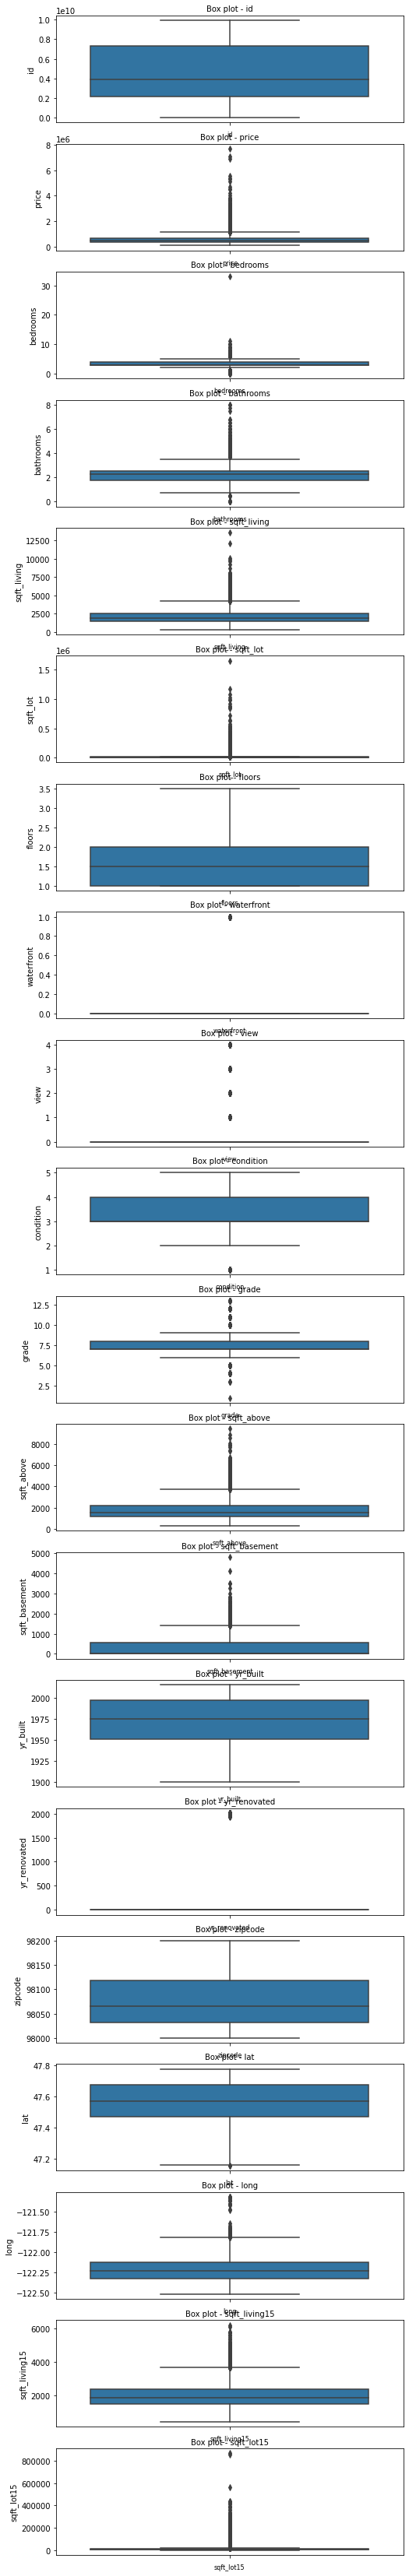

In [11]:
#checking for outliers

col_names =['id',	'price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade',	'sqft_above',
	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15','sqft_lot15']

fig, ax= plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= housing[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [12]:
#checking for unique values in the dataset.
for i in housing.columns:
 print(housing[i].unique())
 print ("\n")

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


[221900. 538000. 180000. ... 541800. 610685. 402101.]


[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


[1180 2570  770 ... 3087 3118 1425]


[ 5650  7242 10000 ...  5813  2388  1076]


[1.  2.  1.5 3.  2.5 3.5]


[0 1]


[0 3 4 2 1]


[3 5 4 1 2]


[ 7  6  8 11  9  5 10 12  4  3 13  1]


[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 172

In [13]:
#checking for anormalies
q1_price = housing['price'].quantile(.25)
q3_price = housing['price'].quantile(.75)

iqr_price = q3_price - q1_price

print('IQR price ' + str(iqr_price))

lowerbound_price = q1_price - (1.5 *iqr_price)
upperbound_price = q3_price + (1.5 *iqr_price)

print('lowerbound_price ' + str(lowerbound_price))
print('upperbound_price ' + str(upperbound_price))

q1_bathroom = housing['bathrooms'].quantile(.25)
q3_bathroom = housing['bathrooms'].quantile(.75)

iqr_bathroom = q3_bathroom - q1_bathroom

print('IQR bathroom ' + str(iqr_bathroom))

lowerbound_bathroom = q1_bathroom - (1.5 *iqr_bathroom)
upperbound_bathroom = q3_bathroom+ (1.5 *iqr_bathroom)

print('lowerbound_bathroom ' + str(lowerbound_bathroom))
print('upperbound_bathroom ' + str(upperbound_bathroom))

q1_bedroom = housing['bedrooms'].quantile(.25)
q3_bedroom = housing['bedrooms'].quantile(.75)

iqr_bedroom = q3_bedroom - q1_bedroom

print('IQR bedroom ' + str(iqr_bedroom))

lowerbound_bedroom = q1_bedroom - (1.5 *iqr_bedroom)
upperbound_bedroom = q3_bedroom+ (1.5 *iqr_bedroom)

print('lowerbound_bedroom ' + str(lowerbound_bedroom))
print('upperbound_bedroom ' + str(upperbound_bedroom))

q1_condition = housing['condition'].quantile(.25)
q3_condition = housing['condition'].quantile(.75)

iqr_condition = q3_condition - q1_condition

print('IQR condition ' + str(iqr_condition))

lowerbound_condition = q1_condition - (1.5 *iqr_condition)
upperbound_condition = q3_condition+ (1.5 *iqr_condition)

print('lowerbound_condition' + str(lowerbound_condition))
print('upperbound_condition ' + str(upperbound_condition))


IQR price 323050.0
lowerbound_price -162625.0
upperbound_price 1129575.0
IQR bathroom 0.75
lowerbound_bathroom 0.625
upperbound_bathroom 3.625
IQR bedroom 1.0
lowerbound_bedroom 1.5
upperbound_bedroom 5.5
IQR condition 1.0
lowerbound_condition1.5
upperbound_condition 5.5


In [14]:
#dealing with outliers

housing = housing[housing['price']<=upperbound_price]
housing.head()

#the lowerbound values were removed as it had negative values.

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

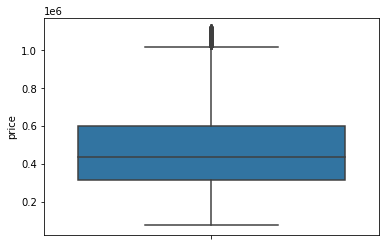

In [15]:
sns.boxplot(y=housing['price'])
plt.show()

I decided to only deal with the outliers in the price column since it had negative values which is not a norm. I didn't remove the rest of the outliers as i think its valuable as it shows extreme variability in their nature, and they are alot so they maybe a rue representation of the real world data.

In [16]:
# Checking for Anomalies
# 
housing.yr_renovated.value_counts()

0       19688
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
housing.shape

(20454, 20)

In [18]:
#dropping the yr_renovate column
housing.drop(['yr_renovated'], axis=1, inplace=True)
housing.shape

(20454, 19)

The year removated column has alot of anomalies, like most of its records dont have dates and it would not be advicable for us to delete the anomalies since it affects 20,699 records and our dataset contains 21,613 records. The best thing to do is to drop the whole column.

In [19]:
#dropping ID column as it wount helpus in analysis
housing.drop(['id'], axis=1, inplace=True)
housing.shape

(20454, 18)

## 6. EDA

### 1.Univariate Analysis

A) NUMERICALS

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20454 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20454 non-null  float64
 1   bedrooms       20454 non-null  int64  
 2   bathrooms      20454 non-null  float64
 3   sqft_living    20454 non-null  int64  
 4   sqft_lot       20454 non-null  int64  
 5   floors         20454 non-null  float64
 6   waterfront     20454 non-null  int64  
 7   view           20454 non-null  int64  
 8   condition      20454 non-null  int64  
 9   grade          20454 non-null  int64  
 10  sqft_above     20454 non-null  int64  
 11  sqft_basement  20454 non-null  int64  
 12  yr_built       20454 non-null  int64  
 13  zipcode        20454 non-null  int64  
 14  lat            20454 non-null  float64
 15  long           20454 non-null  float64
 16  sqft_living15  20454 non-null  int64  
 17  sqft_lot15     20454 non-null  int64  
dtypes: flo

In [21]:
#creating frequency table for bedrooms
housing.bedrooms.value_counts()

3     9597
4     6304
2     2736
5     1335
6      225
1      198
7       30
0       12
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
#creating frequency table for floors
housing.floors.value_counts()

1.0    10446
2.0     7491
1.5     1828
3.0      572
2.5      110
3.5        7
Name: floors, dtype: int64

In [23]:
#creating frequency table for condition
housing.condition.value_counts()

3    13278
4     5417
5     1560
2      170
1       29
Name: condition, dtype: int64

In [24]:
#creating frequency table for grade
housing.grade.value_counts()

7     8969
8     5946
9     2319
6     2037
10     766
5      242
11     137
4       29
12       5
3        3
1        1
Name: grade, dtype: int64

In [25]:
#creating frequency table for year built
housing.yr_built.value_counts()

2014    511
2005    423
2006    409
2004    405
1977    405
       ... 
1901     28
1902     24
1933     22
1935     22
1934     19
Name: yr_built, Length: 116, dtype: int64

B) SUMMARRY STATISTICS

In [26]:
# Ploting the summaries and recording our observations
#
#sumarry statistics
housing.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.045400e+04  20454.000000  ...   20454.000000   20454.000000
mean   4.765912e+05      3.328640  ...    1921.783368   12437.745184
std    2.078479e+05      0.911872  ...     614.487875   26502.753669
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.150000e+05      3.000000  ...    1470.000000    5046.000000
50%    4.372000e+05      3.000000  ...    1800.000000    7542.000000
75%    6.000000e+05      4.000000  ...    2280.000000    9880.000000
max    1.120000e+06     33.000000  ...    5380.000000  871200.000000

[8 rows x 18 columns]

In [27]:
#mode
housing.mode()

price  bedrooms  bathrooms  ...   long  sqft_living15  sqft_lot15
0  350000.0       3.0        2.5  ... -122.3         1540.0      5000.0
1  450000.0       NaN        NaN  ...    NaN            NaN         NaN

[2 rows x 18 columns]

In [28]:
#variance
housing.var()

price            4.320077e+10
bedrooms         8.315104e-01
bathrooms        5.060410e-01
sqft_living      5.991551e+05
sqft_lot         1.601643e+09
floors           2.883316e-01
waterfront       2.973553e-03
view             4.096317e-01
condition        4.188944e-01
grade            1.078071e+00
sqft_above       5.286287e+05
sqft_basement    1.670433e+05
yr_built         8.501704e+02
zipcode          2.845148e+03
lat              1.989794e-02
long             2.028727e-02
sqft_living15    3.775953e+05
sqft_lot15       7.023960e+08
dtype: float64

low variance show how mass of the points are centered around and greater the variance the greater the spread.

In [29]:
#skewness of housing variables
housing.skew()

price             0.744877
bedrooms          2.129971
bathrooms         0.217235
sqft_living       0.835429
sqft_lot         13.422403
floors            0.680919
waterfront       18.230831
view              3.930317
condition         1.024880
grade             0.495895
sqft_above        1.096807
sqft_basement     1.439014
yr_built         -0.458928
zipcode           0.397699
lat              -0.431320
long              0.882249
sqft_living15     0.919081
sqft_lot15        8.896492
dtype: float64

negative-skewd means that the distribution is left-skewed, has a long left tail, while positively-skewed means that the distribution is right-skewed, has a long right tail.

In [30]:
#kurtosis of housing variables
housing.kurt()

price             -0.014911
bedrooms          56.096933
bathrooms          0.231232
sqft_living        0.973589
sqft_lot         310.391794
floors            -0.396139
waterfront       330.395520
view              15.309549
condition          0.549624
grade              0.823972
sqft_above         1.038397
sqft_basement      1.322569
yr_built          -0.643511
zipcode           -0.864806
lat               -0.772085
long               1.004852
sqft_living15      0.852001
sqft_lot15       124.582037
dtype: float64

A positive value shows that a tail is heavy, meaning there is alot of data on the tail, while negative tail shows that the tail is light meaning that there are few data on the tail.

### 2. Bivariate Analysis

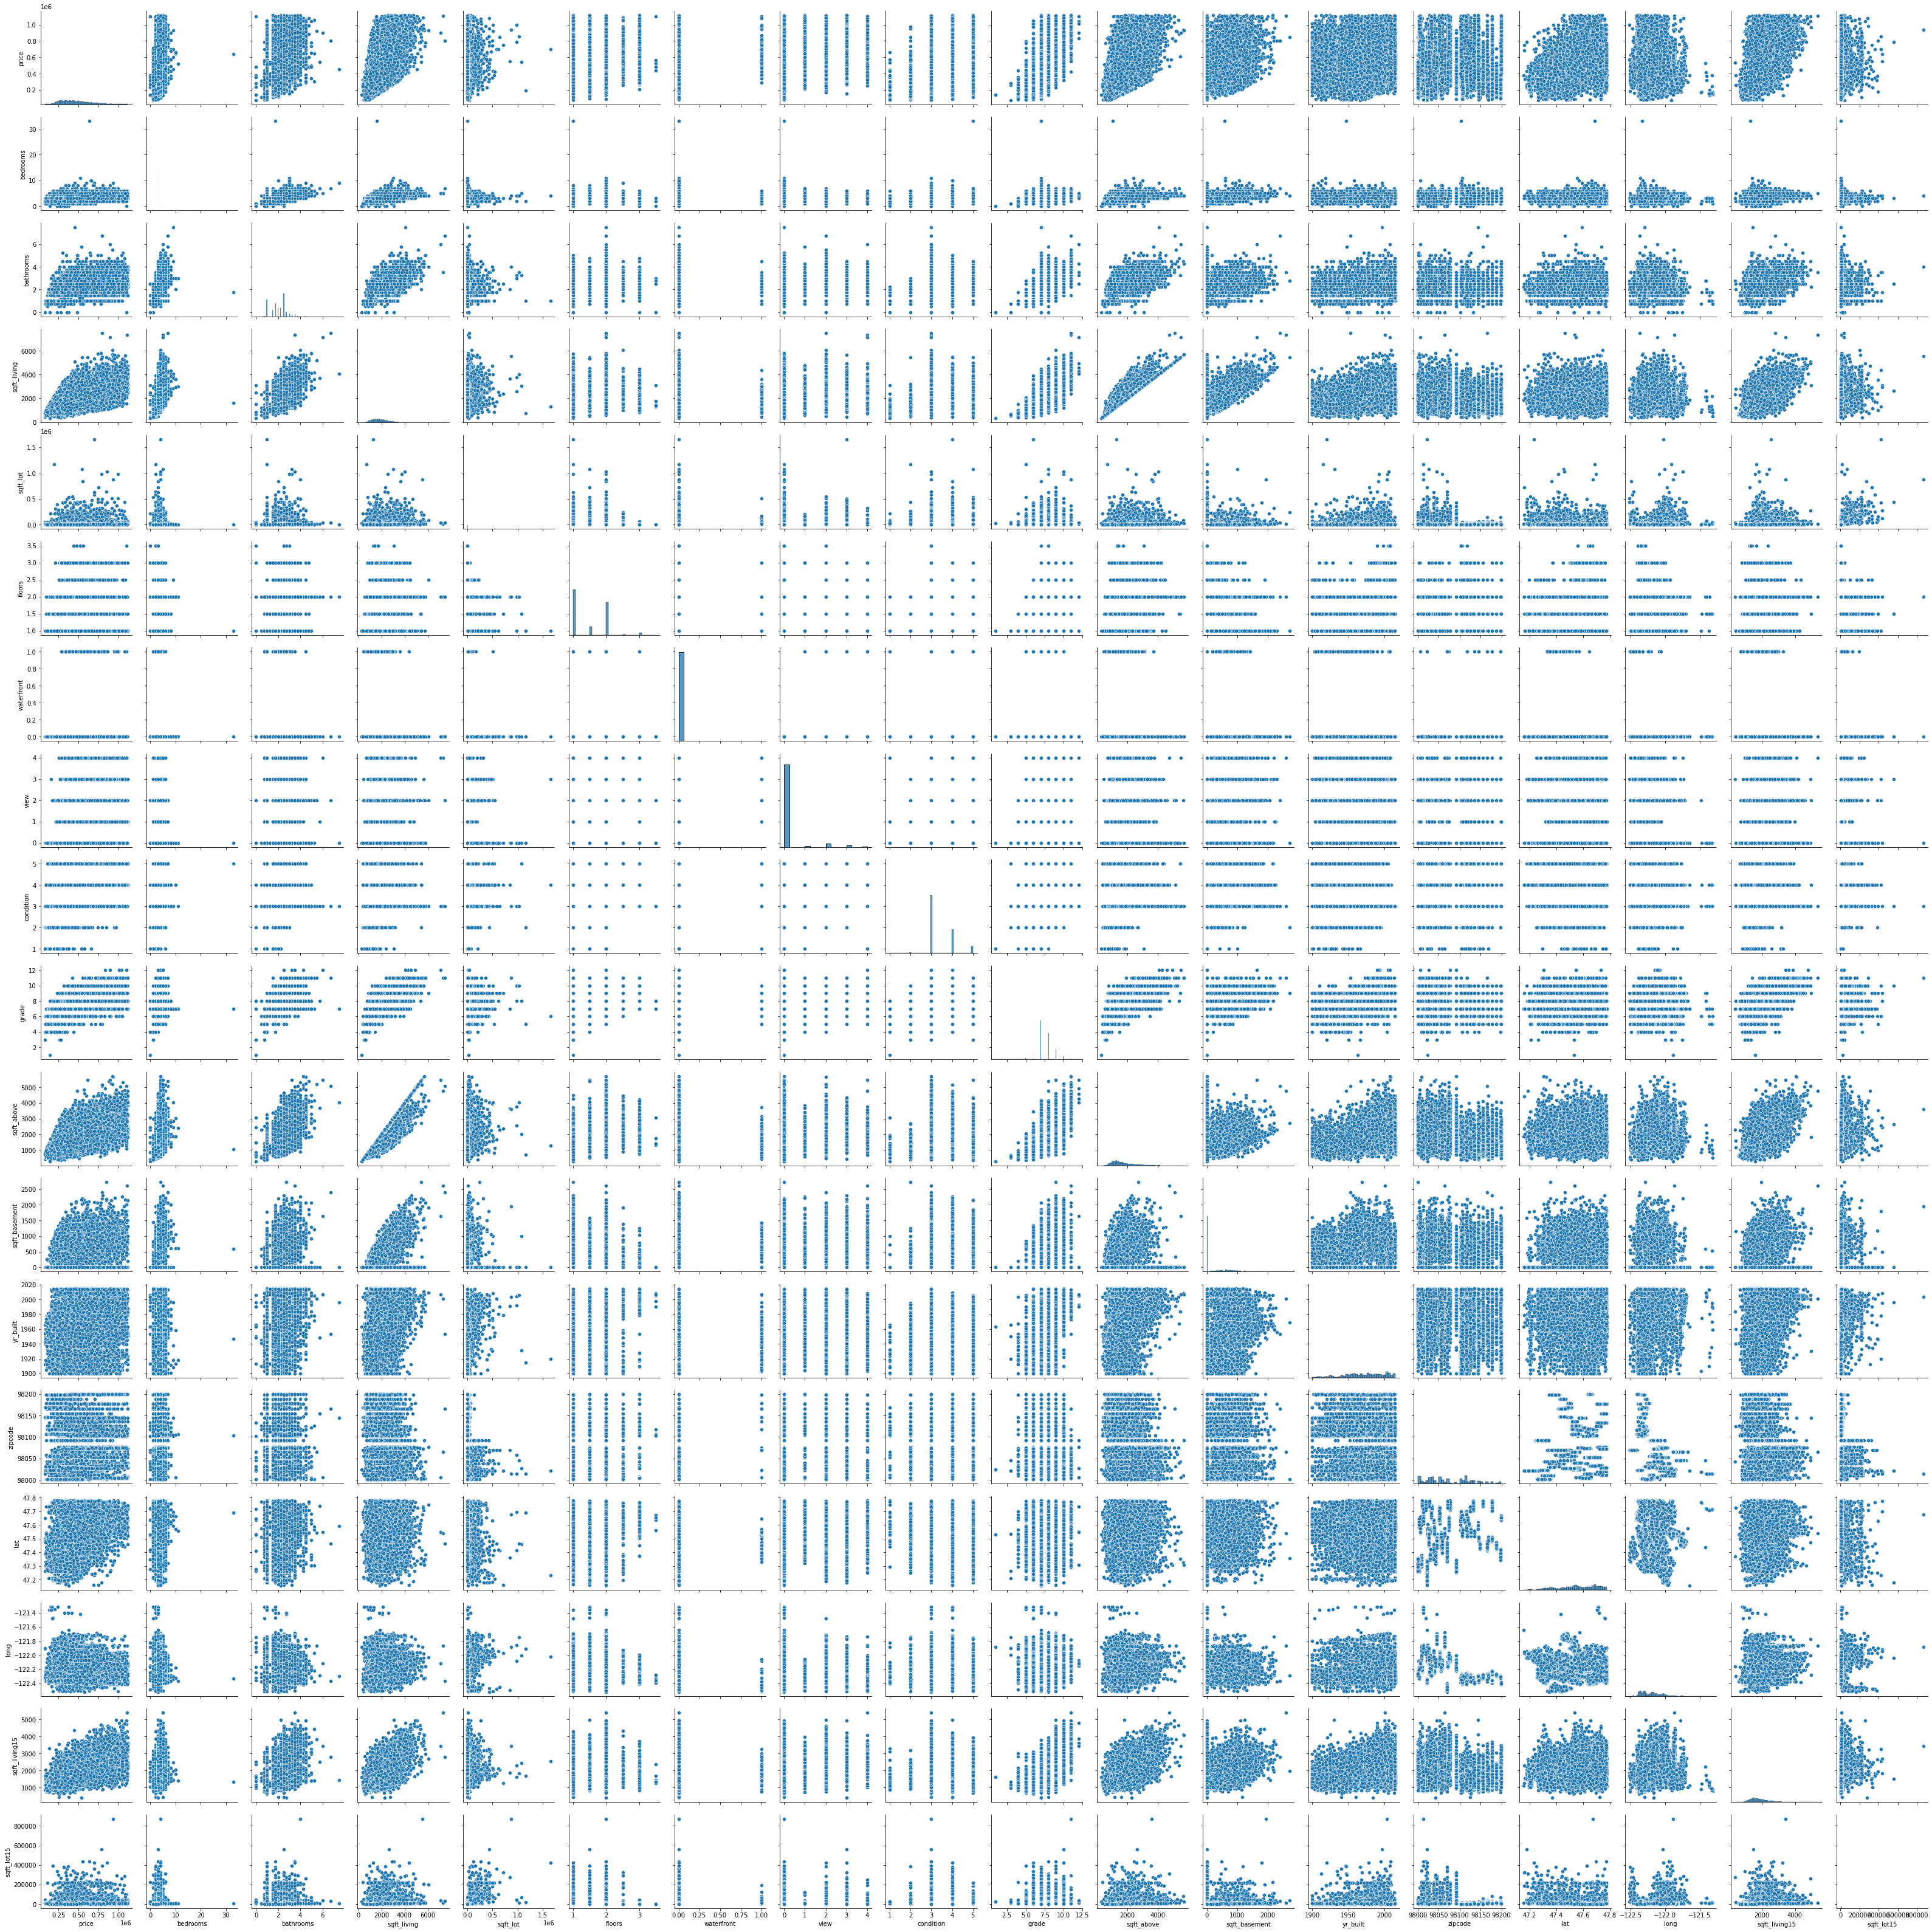

In [31]:
sns.pairplot(housing)
plt.show()
#this shows that there is week relation ship between some numericals and others don't have relationship at all

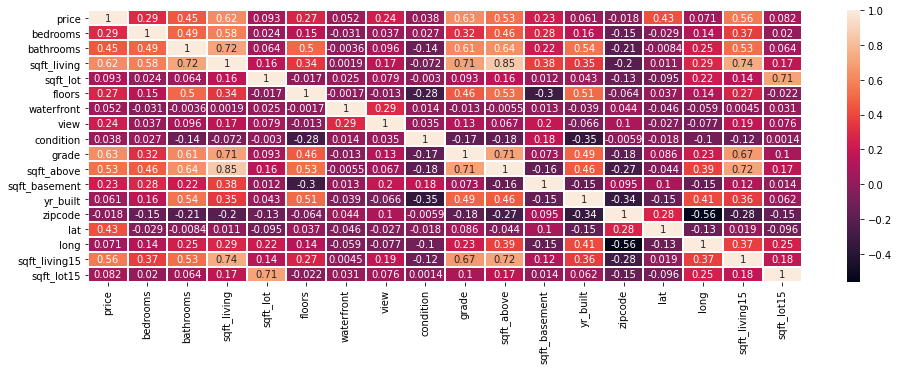

In [32]:
plt.figure(figsize = (16,5))
sns.heatmap(housing.corr(), annot=True, linewidths=1)
plt.show()
#it clearly show how some numericals have week relationship and others dont have.

### 3. Multivariate Analysis

In [98]:

# separating labels and features
X = housing.drop('price',axis=1)
y = housing['price']

In [99]:
#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
# scaling the data
from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [102]:
#training and making prediction
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [103]:
#evaluating performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.016377413835248107


FEATURE REDUCTION USING LDA

In [104]:
lda= LDA()

lda_ = lda.fit(X, y)
lda_feat = lda_.transform(X)

#Display the coefficient of reducted columns
lda_.coef_

array([[-2.52545626e+00, -6.67140307e+00,  1.95640689e-03, ...,
         1.75278575e+01, -9.23961387e-04,  2.13176674e-05],
       [-6.89691185e-01, -4.31203188e-02, -1.49167884e-03, ...,
         3.72985916e+00,  3.43479841e-03, -6.44709487e-06],
       [-2.75355751e+00,  1.07614088e+00, -1.48065558e-04, ...,
         2.52645257e+01, -9.96683734e-05, -1.40028956e-05],
       ...,
       [-5.56014832e-01,  9.82704096e-01,  1.90068916e-03, ...,
        -3.88405341e+00,  1.95688877e-03, -5.10368226e-06],
       [-8.55104912e-02,  3.55231254e-01,  2.56156329e-03, ...,
        -2.73069377e+00,  5.50561430e-04, -5.11250840e-06],
       [-8.74261801e-01, -5.62504005e-01,  3.24302902e-03, ...,
        -6.02748818e+00,  2.09738464e-03, -4.90980151e-06]])

In [105]:
#create a dataframe so that we can extract the names of columns
f_df = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
f_df.sort_values(0, ascending=False)

0
long           17.527857
floors          1.347657
yr_built        0.158241
zipcode         0.008556
sqft_basement   0.002533
sqft_living     0.001956
sqft_above      0.000842
sqft_lot15      0.000021
sqft_lot       -0.000020
sqft_living15  -0.000924
view           -0.863997
condition      -2.485524
bedrooms       -2.525456
bathrooms      -6.671403
grade         -11.455684
waterfront    -12.139931
lat           -42.569771

## 7. Regression Analysis

### 1.Multiple Linear Regression


In [84]:
X=housing.drop('price',axis=1)
y=housing['price']

In [85]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
# Training the Algorithm
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
bedrooms        -8967.197062
bathrooms       23506.015110
sqft_living        49.162458
sqft_lot            0.223459
floors          33078.091408
waterfront     121986.457416
view            30331.981241
condition       24099.601046
grade           71794.569558
sqft_above         24.091006
sqft_basement      25.071452
yr_built        -1822.074043
zipcode          -228.001338
lat            546431.996055
long           -48537.514074
sqft_living15      46.423402
sqft_lot15         -0.116015

As we can see sqft_lot15 has little effect on the price of the house.

As the year of the house built increases the price reduces.

As the condition of the house increases the price also increases.

In [88]:
# Making Predictions
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
14008  129000.0  147783.441576
2390   371000.0  460347.024259
15117  345000.0  342572.887066
10225  457500.0  453347.713792
14351  319500.0  269304.616445
...         ...            ...
5299   405000.0  353033.361946
19128  424500.0  419198.344627
11895  336000.0  416417.311278
16939  262500.0  508395.223817
2990   765000.0  682891.355621

[4091 rows x 2 columns]

In [89]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 86262.60431960928
Mean Squared Error: 13029083492.603409
Root Mean Squared Error: 114145.01080907308


DETECTING MULTICOLINEARITY

In [90]:
# Let's display the correlations between the variables
correlations = X.corr()
correlations

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.492077  ...       0.370365    0.020436
bathrooms      0.492077   1.000000  ...       0.528446    0.064114
sqft_living    0.583920   0.716240  ...       0.737969    0.171790
sqft_lot       0.023829   0.064375  ...       0.143148    0.709638
floors         0.152710   0.500742  ...       0.268361   -0.021883
waterfront    -0.030528  -0.003599  ...       0.004528    0.031164
view           0.037129   0.095779  ...       0.186440    0.076055
condition      0.026703  -0.135634  ...      -0.118135    0.001425
grade          0.321105   0.614009  ...       0.670903    0.101945
sqft_above     0.462978   0.637879  ...       0.717650    0.174936
sqft_basement  0.282272   0.221734  ...       0.120978    0.014151
yr_built       0.159577   0.543634  ...       0.363242    0.062410
zipcode       -0.147109  -0.205917  ...      -0.283939   -0.147488
lat           -0.028567  -0.008416  ...       0.019281   -0.096177
long           0.137701   0.246863  ...       0.373378    0.248821
sqft_living15  0.370365   0.528446  ...       1.000000    0.179826
sqft_lot15     0.020436   0.064114  ...       0.179826    1.000000

[17 rows x 17 columns]

It shows that there are week relation between the variable

In [91]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.658998  -0.409024  ...       0.085446    0.089508
bathrooms     -0.409024   2.974375  ...       0.076039    0.077291
sqft_living   -1.123319  -3.701262  ...      -0.912460   -0.226412
sqft_lot       0.045545  -0.020994  ...       0.111247   -1.402271
floors         0.092291  -0.699171  ...       0.329288    0.061708
waterfront     0.030915  -0.019270  ...       0.028296   -0.027334
view           0.086153  -0.047149  ...      -0.283419   -0.021198
condition     -0.052956  -0.098404  ...       0.081047   -0.022685
grade          0.258095  -0.217210  ...      -0.740170    0.040940
sqft_above     0.083213   2.433867  ...      -0.769118    0.053208
sqft_basement  0.058059   0.943448  ...      -0.026340    0.042847
yr_built       0.120224  -0.824591  ...      -0.018010   -0.018468
zipcode        0.087541   0.056585  ...       0.202913   -0.006362
lat            0.043299  -0.026658  ...      -0.123827    0.041969
long           0.042452   0.027027  ...      -0.304771   -0.163860
sqft_living15  0.085446   0.076039  ...       2.809755   -0.100968
sqft_lot15     0.089508   0.077291  ...      -0.100968    2.080153

[17 rows x 17 columns]

The highest VIF score is 3.9 which indicates that the independent variables are moderately correleted

RESIDUAL PLOT 

In [92]:
# This is our prediction for price based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.6663380741649172

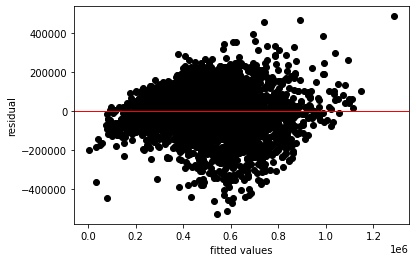

In [93]:
#showing the residual plot
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

HETEROSKEDASTICTY using Barlett's test.

In [94]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [95]:
#multilinear scores
print('Training score: ', regressor.score(X_train, y_train))
print('Test score: ', r2_score(y_test, y_pred))

Training score:  0.6936946532739476
Test score:  0.7033179743130198


This is a good model as it works best on test model.

### 2. Quantile Regression


In linear regression models, there is an assumption that the error term has a constant variance across the values of independent variable X. However, when the assumption is no longer true, we use quantile regression

In [111]:
## Creating a linear regression model regression on the above dataset
#
X = housing[['sqft_living','bathrooms', 'long']]
y = housing['price']


model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))

Mean squared error: 25961982194.85
Variance score: 0.40


Text(0.5, 1.0, 'Linear regression')

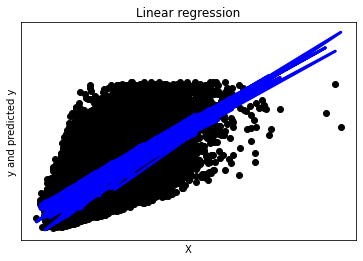

In [113]:

## Plotting the regression
plt.figure(2)
plt.scatter(X['sqft_living'], y,  color='black')
plt.plot(X['sqft_living'], y_pred1, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("X")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

In [114]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', housing)
res = mod.fit(q=0.5)

# Then print out the summary of our model
#
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2194
Model:                       QuantReg   Bandwidth:                   2.954e+04
Method:                 Least Squares   Sparsity:                    4.302e+05
Date:                Sat, 24 Jul 2021   No. Observations:                20454
Time:                        11:44:14   Df Residuals:                    20450
                                        Df Model:                            3
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.805e+07   1.35e+06    -13.366      0.000   -2.07e+07   -1.54e+07
X[0]         176.5945      2.821     62.599      0.000     171.065     182.124
X[1]        1.143e+04   3036.010      3.766      0.000    5483.451    1.74e+04
X[2]       -1.485e+05    1.1e+04    -13.450      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [118]:
## Similarly we can do the models for other quantiles
# 
X=X['sqft_living']
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


KeyError: ignored

### 3. Ridge Regression


Uses L2 regularization

In [308]:
from sklearn.linear_model import Ridge

X = housing.drop(['price'], axis=1)
y = housing['price']

In [309]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
ridge = Ridge(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [310]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_) 


{'alpha': 0.01}


13268501938.829723

In [311]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
model_1 = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(model_1)

13145827226.630493


In [304]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 39.22339844480427,
 'bedrooms': 24271.807718669326,
 'condition': 70618.84517380902,
 'floors': 121764.03904378189,
 'grade': 34.02701826436965,
 'lat': -48281.01799656612,
 'long': 47.92343343345482,
 'price': -9415.63900315561,
 'sqft_above': 33.004849402920954,
 'sqft_basement': -1814.8561110718053,
 'sqft_living': 0.22544786082433987,
 'sqft_living15': -0.1310444824271811,
 'sqft_lot': 33279.35731677849,
 'view': 25302.71975492521,
 'waterfront': 30724.90080431779,
 'yr_built': -213.2427005786236,
 'zipcode': 541394.6822057295}

In [315]:
#Ridge scores
print('Training score: ', ridge.score(X_train, y_train))
print('Test score: ', r2_score(y, ridge.predict(X)))

Training score:  0.6944271233427781
Test score:  0.6956889895248317


There is no much differen between the test and training score

### 4. Lasso Regression


Uses l1 regularization

In [225]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
X = housing.drop(['price'], axis=1)
y = housing['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [226]:
# Creating lasso object
# 
from sklearn import linear_model
lasso = linear_model.Lasso() 

lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998524173262097
lasso MSE: 40504545639.722374
lasso coef: [ -3721.47034223 -33289.34283726  31706.64764677 259463.35492305
   5034.05245945   3655.73809075  50412.29416233  40686.90126547
  17100.95285177 112964.85055691 -83886.21166793 -58549.86597024
 -77085.30364978   7894.77484649 -31158.0401249   83471.60682443
 -29995.45369982  14811.69160008 -10818.04221963]


In [227]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch.
from sklearn.model_selection import GridSearchCV
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 22.0}
lasso score: 0.7097981459112108
linear score: 0.7097979503543681
lasso MSE: 41199049670.91474
linear MSE: 41199077433.50815
lasso best estimator coef: [ -3915.86874427 -34383.80473124  27819.40431192 209183.54785814
   5559.12182129   6198.04213109  47842.97714899  39820.39699513
  18851.19151974 113290.9015451  -38866.01732619 -34913.61284178
 -77056.55591458   6960.70499011 -31374.49832636  83410.00052147
 -30231.6538158   16584.77038462 -10163.45663272]
linear coef: [ -3936.41071476 -34411.53089945  27963.00707332  81453.38186246
   5626.14497248   6203.60578104  47858.28170049  39819.36181458
  18874.21382743 113233.61517068  76155.84896985  26540.46104099
 -77098.15137295   6975.56027408 -31429.89055346  83440.94368782
 -30284.54119548  16715.24287157 -10224.66442524]


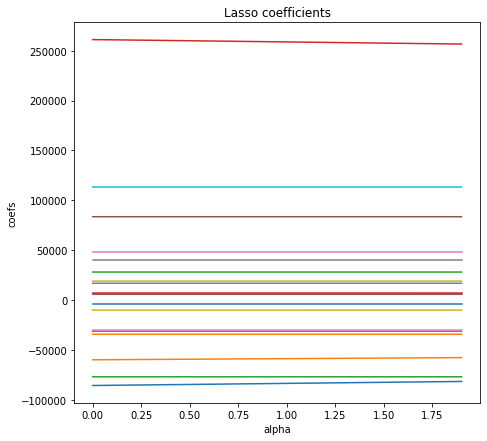

In [228]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 2, 0.1) 
for i in range(20):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 
# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [229]:
lassoReg = Lasso(alpha=22, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

# calculating mse

mse = np.mean((y_test, gridlasso.predict(X_test)))


print("Mse:", mse)
lassoReg.score(X_test,y_test)

Mse: 541414.1378242625


0.7084128288180326

In [230]:
#lasso scores
print('Training score: ', gridlasso.score(X_train, y_train))
print('Test score: ', r2_score(y_test, gridlasso.predict(X_test)))

Training score:  0.6960108824982087
Test score:  0.7097981459112108


### 5.Elastic Net Regression

Uses both l1 and L2 regularization

In [105]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
X = housing.drop(['price'], axis=1)
y = housing['price']

In [106]:
# Elastic Net Model
from sklearn.model_selection import GridSearchCV

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [107]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


13286078273.940008

In [170]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y, y_pred=elastic.predict(X)))
print(second_model)

40605329138.93597


In [231]:
#Elastic Net scores
print('Training score: ', elastic.score(X_train, y_train))
print('Test score: ', r2_score(y, elastic.predict(X)))

Training score:  0.6951573124457127
Test score:  0.6991055894533229


## 8. Implementing the Solution

The following results scores is what we got from the models from differen regression and we can use it to choose the best regression type for the dataset from them.

We can see Lasso has the best score.

1. Multiple linear

Training score:  0.6936946532739476

Test score:  0.7033179743130198

2. Quantile

3. lasso

Training score:  0.6960108824982087

Test score:  0.7097981459112108


4. Ridge

Training score:  0.693631436541785

Test score:  0.7033179743130196

5. Elastic

Training score:  0.6951573124457127

Test score:  0.6991055894533229


From the models that we have created, it will be now easy to predict a price of a house using the best model in regards to the kind of data and out come we want.

## 9. Challenge the solution

 Reviewing the Solution 

There were alot of outliers which might affect the model, if we were provided with other dataset or metadata we would know more about the outliers and how to act on them and produce better perfoming models.

## 10. Follow up question

### a). Did we have the right data?


Yes

### b). Do we need other data to answer our question?


Yes, we need more data and metadata.

### c). Did we have the right question?

Yes